In [2]:
pip install matplotlib tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np 
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [4]:
x_train = np.loadtxt('input.csv',delimiter = ',')
y_train = np.loadtxt('labels.csv',delimiter = ',')

x_test = np.loadtxt('input_test.csv',delimiter = ',')
y_test = np.loadtxt('labels_test.csv',delimiter = ',')

In [5]:
x_train = x_train.reshape(len(x_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)

x_test = x_test.reshape(len(x_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test),1)

x_train = x_train/255.0
x_test = x_test/255.0

#data augmention to improve training
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    zoom_range = 0.2
)

In [6]:
print("Shape of x_train: ",x_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of x_test: ",x_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (2000, 100, 100, 3)
Shape of y_train:  (2000, 1)
Shape of x_test:  (400, 100, 100, 3)
Shape of y_test:  (400, 1)


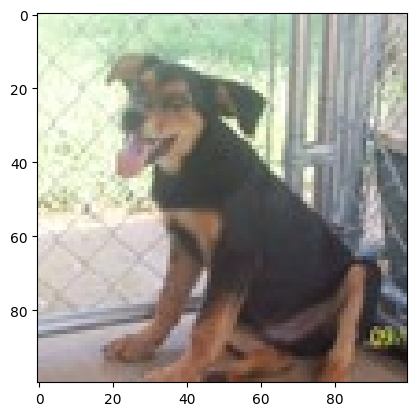

In [7]:
idx = random.randint(0,len(x_train))
plt.imshow(x_train[idx, :])
plt.show()

In [8]:
model = Sequential([
    Conv2D(32,(3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32,(3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1,activation = 'sigmoid')
])

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model = Sequential()

model.add(Conv2D(32, (3,2), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2))),
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,2), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2))),
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,2), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2))),
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))


In [10]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [11]:
model.fit(datagen.flow(x_train, y_train, batch_size = 32),
          epochs = 50,
          validation_data = (x_test, y_test),
          verbose = 1)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 353ms/step - accuracy: 0.5065 - loss: 0.7009 - val_accuracy: 0.5000 - val_loss: 0.6916
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 310ms/step - accuracy: 0.5270 - loss: 0.6920 - val_accuracy: 0.5875 - val_loss: 0.6828
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 329ms/step - accuracy: 0.5300 - loss: 0.6871 - val_accuracy: 0.5875 - val_loss: 0.6771
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 304ms/step - accuracy: 0.5670 - loss: 0.6825 - val_accuracy: 0.6050 - val_loss: 0.6743
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 291ms/step - accuracy: 0.5495 - loss: 0.6881 - val_accuracy: 0.6450 - val_loss: 0.6608
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 300ms/step - accuracy: 0.5740 - loss: 0.6754 - val_accuracy: 0.6125 - val_loss: 0.6650
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 294ms/step - accuracy: 0.5715 - loss: 0.6806 - val_accuracy: 0.6225 - val_loss: 0.6703
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 294ms/step - accuracy: 0.5875 - loss: 0.6732 - val_accu

In [12]:
model.evaluate(x_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7600 - loss: 0.5101


[0.5100991725921631, 0.7599999904632568]

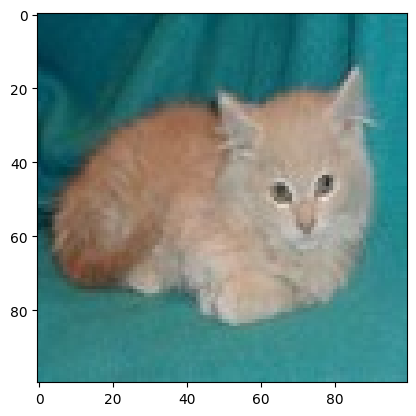

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
Our model says it is a:  cat


In [13]:
indx2 = random.randint(0,len(y_test))
plt.imshow(x_test[indx2, :])
plt.show()

y_pred = model.predict(x_test[indx2, :].reshape(1,100,100,3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a: ", pred)

In [14]:
model.save('model.h5')
print("saved model to disk")

saved model to disk
